In [7]:
import xarray as xr
import numpy as np
import pandas as pd

In [94]:
local_path = '/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/Curnagl/ERA5_1990_2m_dewpoint_temperature.nc'

dew_point_xr = xr.open_dataset(local_path)
dew_point_xr

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 2920)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 ... 1990-12-31T21:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [95]:
# import 1st track

#head = ['lon_east', 'lon_west', 'lat_south', 'lat_north']
track_1 = pd.read_csv('tc_irad_tracks/tc_irad_1.txt')
#track_1.columns = head

In [96]:
# slice the time dimension

dates = pd.read_csv('storms_start_end.csv', sep=',')

start_first = dates['start_date'][0]
end_first = dates['end_date'][0]

dew_point_xr = dew_point_xr.sel(time=slice(start_first, end_first))
dew_point_xr

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 62)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-21T03:00:00 ... 1990-01-28T18:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [97]:
# create new pd dataframe

first_slice = track_1.iloc[0]

test_dp     = dew_point_xr.sel(longitude=slice(first_slice['lon_east'], first_slice['lon_west']), latitude=slice(first_slice['lat_north'], first_slice['lat_south']))
test_dp

<xarray.Dataset>
Dimensions:    (longitude: 32, latitude: 32, time: 62)
Coordinates:
  * longitude  (longitude) float32 285.0 285.2 285.5 285.8 ... 292.2 292.5 292.8
  * latitude   (latitude) float32 45.5 45.25 45.0 44.75 ... 38.25 38.0 37.75
  * time       (time) datetime64[ns] 1990-01-21T03:00:00 ... 1990-01-28T18:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

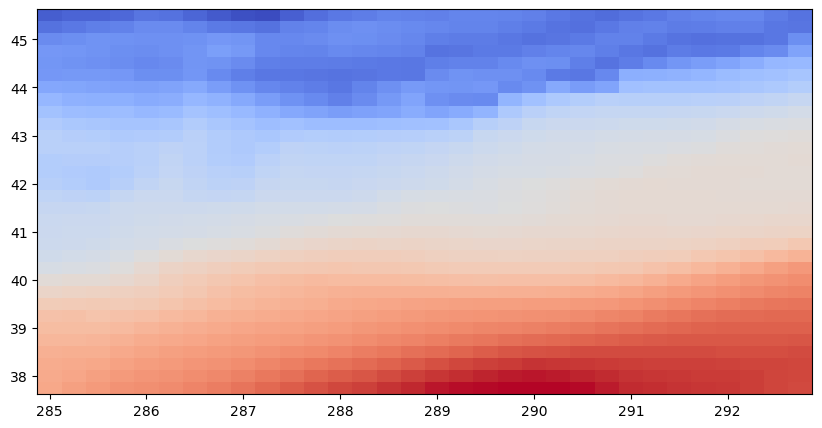

In [98]:
# plot the first slice with matplotlib

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.pcolormesh(test_dp.longitude, test_dp.latitude, test_dp.d2m[0,:,:], cmap='coolwarm')

In [99]:
# check if it's correct

lon_test = np.asanyarray(dew_point_xr.longitude[:])
lat_test = np.asanyarray(dew_point_xr.latitude[:])


closest_lon_w =np.abs(lon_test - first_slice['lon_west']).argmin()
closest_lon_e = np.abs(lon_test - first_slice['lon_east']).argmin()
closest_lat_s = np.abs(lat_test - first_slice['lat_south']).argmin()
closest_lat_n = np.abs(lat_test - first_slice['lat_north']).argmin()

lon_test[closest_lon_w]
lat_test[closest_lat_s]

# works

37.75

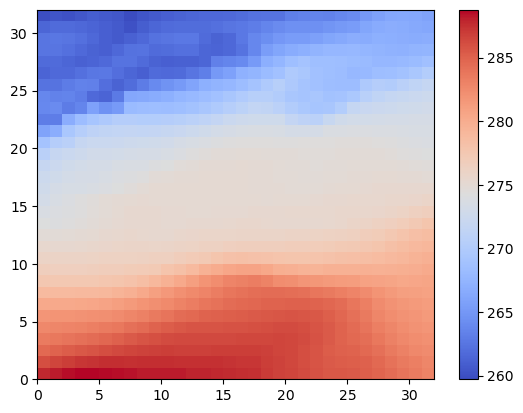

In [100]:
#slice with new boundaries

plt.pcolormesh(np.flipud(dew_point_xr['d2m'][0,176:208,1157:1189]), cmap='coolwarm')
plt.colorbar()

In [101]:
lat_test[208]

38.0

In [102]:
# iterate through each time step

var_out = []

for i in range(0, len(track_1)):
    lon_e_temp, lon_w_temp, lat_s_temp, lat_n_temp = track_1.iloc[i]

    lon_test = np.asanyarray(dew_point_xr.longitude[:])
    lat_test = np.asanyarray(dew_point_xr.latitude[:])

    closest_lon_w =np.abs(lon_test - lon_w_temp).argmin()
    closest_lon_e = np.abs(lon_test - lon_e_temp).argmin()
    closest_lat_s = np.abs(lat_test - lat_s_temp).argmin()
    closest_lat_n = np.abs(lat_test - lat_n_temp).argmin()

    temp_ds = np.asarray(dew_point_xr['d2m'])

    var_out.append(temp_ds[i,closest_lat_n:closest_lat_s,closest_lon_e:closest_lon_w])

var_out

[array([[258.65454, 258.95328, 258.94098, ..., 261.9512 , 261.98108,
         262.14804],
        [259.5736 , 260.1096 , 260.0973 , ..., 262.6629 , 261.83524,
         261.25006],
        [261.055  , 261.62964, 262.02676, ..., 262.16913, 261.45215,
         261.31155],
        ...,
        [280.42026, 280.48   , 280.58722, ..., 287.40018, 287.43005,
         287.50388],
        [280.74185, 280.88593, 281.19873, ..., 287.95724, 287.88168,
         287.80435],
        [280.93338, 281.31998, 281.7769 , ..., 288.26126, 287.95197,
         287.80963]], dtype=float32),
 array([[256.80414, 257.58084, 256.89728, ..., 262.89487, 263.1321 ,
         263.14264],
        [257.4385 , 257.83038, 257.76184, ..., 263.38867, 264.074  ,
         264.4237 ],
        [258.44016, 258.63522, 259.51385, ..., 265.28302, 265.97186,
         266.5342 ],
        ...,
        [283.8821 , 283.98227, 284.1211 , ..., 286.51804, 286.2843 ,
         285.86258],
        [285.1333 , 285.367  , 285.51288, ..., 286.5813 ,

In [103]:
print(closest_lon_w, closest_lon_e, closest_lat_s, closest_lat_n)

1430 1398 116 84


In [104]:
# check if each square has the same shape

for i in range(0, len(var_out)):
    print(var_out[i].shape)

(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


In [105]:
# mean, min, max value of each time step

mean_out_d2m = []
min_out_d2m = []
max_out_d2m = []

for i in range(0, len(var_out)):
    mean_out_d2m.append(np.mean(var_out[i]))
    min_out_d2m.append(np.min(var_out[i]))
    max_out_d2m.append(np.max(var_out[i]))

In [106]:
# save as csv

df_mean = pd.DataFrame(mean_out_d2m)
df_min = pd.DataFrame(min_out_d2m)
df_max = pd.DataFrame(max_out_d2m)

df_mean.to_csv('d2m_mean.csv')
df_min.to_csv('d2m_min.csv')
df_max.to_csv('d2m_max.csv')

For all variables, (class by variable (folder), then by storm)) 